<a href="https://colab.research.google.com/github/QuiqueCov/Maestria/blob/main/granosdecafe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instrucciones
Imagina que tenemos el siguiente pedido del cliente:

"Hemos juntado datos del grano de cafe y de cateadores profesionales, nos gustaría usar tus habilidades en ML para descubrir tendencias en los datos.

¿Sería posible crear representación visual de los datos usando las variables: Aroma, Flavor, Aftertaste, Acidity, Body, Balance, Uniformity, Clean Cup, Sweetness. Cualquier cosa interesante nos sirve."



Datos del cliente:

data-1.csvDownload data-1.csv





Instrucciones:

1. Crea un libro de colab para tu experimento y agrega tus datos al principio.

2. Lleva acabo el pedido del cliente con lo que has aprendido hasta el momento.

3. Usa los bloques de texto para comentar tu código y exponer tus ideas.

4. Elige las variables que te parezcan interesantes.

5. Recuerda explorar los datos, limpiarlos, codificarlos y/o preprocesarlos.

6. Crea una representación bidimensional de los datos usando alguna técnica de reducción de dimensionalidad.

7. En el espacio embebido, ejecuta algun método de agrupación.

8. Usa estadística descriptiva para entender cada agrupación.

9. En un bloque de texto redacta una conclusión aprendida de los datos para que el cliente vea tus hallazgos.

5. Descarga tu libro de colab con las celdas ejecutadas y guardalo como ipynb.

6. Subelo aquí.



Nota importante: esto será calificado de manera manual por tu profesor.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('data-1.csv')

In [ ]:
data

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,"Los Santos,Tarrazu",...,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,"Popayan,Cauca",...,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,202,202,Brazil,Fazenda Conquista,019/22,Dry Mill,NaN,Ipanema Coffees,950,Sul de Minas,...,80.08,11.4,0,0,green,4,"February 2nd, 2024",Brazil Specialty Coffee Association,"Rua Gaspar Batista Paiva, 416 – Santa Luiza Va...",Chris Allen - 55 35 3212-4705
203,203,203,Nicaragua,Finca San Felipe,017-053-0155,Beneficio Atlantic Sébaco,017-053-0155,Exportadora Atlantic S.A,1200,Matagalpa,...,80.00,10.4,0,2,green,12,"March 2nd, 2024",Asociación de Cafés Especiales de Nicaragua,"Del Hotel Seminole 2 C al lago, 1 C arriba.",Maria Ines Benavidez Toval - 011-(505)-8396 4717
204,204,204,Laos,-,105/3/VL7285-005,DRY MILL,105/3/VL7285-005,Marubeni Corporation,1300,Bolaven Plateau,...,79.67,11.6,0,9,green,11,"November 11th, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
205,205,205,El Salvador,"Rosario de Maria II, Area de La Pila",0423A01,"Optimum Coffee, San Salvador, El Salvador",NaN,Aprentium Enterprises LLC,1200,"Volcan de San Vicente, La Paz, El Salvador",...,78.08,11.0,0,12,bluish-green,13,"March 7th, 2024",Salvadoran Coffee Council,"Final 1a. Av. Norte y 13 Calle Pte., dentro de...",Tomas Bonilla - (503) 2505-6600


In [ ]:
data.columns


Index(['Unnamed: 0', 'ID', 'Country of Origin', 'Farm Name', 'Lot Number',
       'Mill', 'ICO Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number of Bags', 'Bag Weight', 'In-Country Partner', 'Harvest Year',
       'Grading Date', 'Owner', 'Variety', 'Status', 'Processing Method',
       'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean Cup', 'Sweetness', 'Overall', 'Defects',
       'Total Cup Points', 'Moisture Percentage', 'Category One Defects',
       'Quakers', 'Color', 'Category Two Defects', 'Expiration',
       'Certification Body', 'Certification Address', 'Certification Contact'],
      dtype='object')

In [ ]:
data.describe()


,Unnamed: 0,ID,Number of Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Category Two Defects
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.00000,207.000000,207.000000,207.000000,207.0,207.0,207.000000,207.0,207.000000,207.000000,207.000000,207.000000,207.000000
mean,103.000000,103.000000,155.449275,7.721063,7.744734,7.599758,7.69029,7.640918,7.644058,9.990338,10.0,10.0,7.676812,0.0,83.706570,10.735266,0.135266,0.690821,2.251208
std,59.899917,59.899917,244.484868,0.287626,0.279613,0.275911,0.25951,0.233499,0.256299,0.103306,0.0,0.0,0.306359,0.0,1.730417,1.247468,0.592070,1.686918,2.950183
min,0.000000,0.000000,1.000000,6.500000,6.750000,6.670000,6.83000,6.830000,6.670000,8.670000,10.0,10.0,6.670000,0.0,78.000000,0.000000,0.000000,0.000000,0.000000
25%,51.500000,51.500000,1.000000,7.580000,7.580000,7.420000,7.50000,7.500000,7.500000,10.000000,10.0,10.0,7.500000,0.0,82.580000,10.100000,0.000000,0.000000,0.000000
50%,103.000000,103.000000,14.000000,7.670000,7.750000,7.580000,7.67000,7.670000,7.670000,10.000000,10.0,10.0,7.670000,0.0,83.750000,10.800000,0.000000,0.000000,1.000000
75%,154.500000,154.500000,275.000000,7.920000,7.920000,7.750000,7.87500,7.750000,7.790000,10.000000,10.0,10.0,7.920000,0.0,84.830000,11.500000,0.000000,1.000000,3.000000
max,206.000000,206.000000,2240.000000,8.580000,8.500000,8.420000,8.58000,8.250000,8.420000,10.000000,10.0,10.0,8.580000,0.0,89.330000,13.500000,5.000000,12.000000,16.000000


In [ ]:
# buscar valores de tipo nan
nan_count_per_column = data.isnull().sum()
print(nan_count_per_column)

Unnamed: 0                 0
ID                         0
Country of Origin          0
Farm Name                  2
Lot Number                 1
Mill                       3
ICO Number               132
Company                    0
Altitude                   1
Region                     2
Producer                   1
Number of Bags             0
Bag Weight                 0
In-Country Partner         0
Harvest Year               0
Grading Date               0
Owner                      0
Variety                    6
Status                     0
Processing Method          5
Aroma                      0
Flavor                     0
Aftertaste                 0
Acidity                    0
Body                       0
Balance                    0
Uniformity                 0
Clean Cup                  0
Sweetness                  0
Overall                    0
Defects                    0
Total Cup Points           0
Moisture Percentage        0
Category One Defects       0
Quakers       

Con este primer analisis hay muchas cosas que llaman mi atencion

La primera es:
Las columnas.

Unamed : 0 y ID creo que no son necesarias, debido a que parace ser un error en el dataset, creo que corresponden mas a como se enumeran los renglones.

Asi que seran las primeras que eliminare.






In [ ]:
df = data.copy()

In [ ]:
df

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,"Los Santos,Tarrazu",...,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,"Popayan,Cauca",...,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,202,202,Brazil,Fazenda Conquista,019/22,Dry Mill,NaN,Ipanema Coffees,950,Sul de Minas,...,80.08,11.4,0,0,green,4,"February 2nd, 2024",Brazil Specialty Coffee Association,"Rua Gaspar Batista Paiva, 416 – Santa Luiza Va...",Chris Allen - 55 35 3212-4705
203,203,203,Nicaragua,Finca San Felipe,017-053-0155,Beneficio Atlantic Sébaco,017-053-0155,Exportadora Atlantic S.A,1200,Matagalpa,...,80.00,10.4,0,2,green,12,"March 2nd, 2024",Asociación de Cafés Especiales de Nicaragua,"Del Hotel Seminole 2 C al lago, 1 C arriba.",Maria Ines Benavidez Toval - 011-(505)-8396 4717
204,204,204,Laos,-,105/3/VL7285-005,DRY MILL,105/3/VL7285-005,Marubeni Corporation,1300,Bolaven Plateau,...,79.67,11.6,0,9,green,11,"November 11th, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
205,205,205,El Salvador,"Rosario de Maria II, Area de La Pila",0423A01,"Optimum Coffee, San Salvador, El Salvador",NaN,Aprentium Enterprises LLC,1200,"Volcan de San Vicente, La Paz, El Salvador",...,78.08,11.0,0,12,bluish-green,13,"March 7th, 2024",Salvadoran Coffee Council,"Final 1a. Av. Norte y 13 Calle Pte., dentro de...",Tomas Bonilla - (503) 2505-6600


In [ ]:
# Eliminando las primeras 2 columnas que creo que no sirven para mi analisis
df = df.drop(columns = ['Unnamed: 0', 'ID'])

In [ ]:
df.head()

,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,Producer,Number of Bags,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",Diego Samuel Bermudez,1,...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,曾福森,1,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,WU TAO CHI,19,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,"Los Santos,Tarrazu",Santa Maria de Dota,1,...,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,"Popayan,Cauca",Camilo Merizalde,2,...,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901


In [ ]:
# ahora volvere a inspeccionar el dataset
df.describe()

,Number of Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Category Two Defects
count,207.000000,207.000000,207.000000,207.000000,207.00000,207.000000,207.000000,207.000000,207.0,207.0,207.000000,207.0,207.000000,207.000000,207.000000,207.000000,207.000000
mean,155.449275,7.721063,7.744734,7.599758,7.69029,7.640918,7.644058,9.990338,10.0,10.0,7.676812,0.0,83.706570,10.735266,0.135266,0.690821,2.251208
std,244.484868,0.287626,0.279613,0.275911,0.25951,0.233499,0.256299,0.103306,0.0,0.0,0.306359,0.0,1.730417,1.247468,0.592070,1.686918,2.950183
min,1.000000,6.500000,6.750000,6.670000,6.83000,6.830000,6.670000,8.670000,10.0,10.0,6.670000,0.0,78.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,7.580000,7.580000,7.420000,7.50000,7.500000,7.500000,10.000000,10.0,10.0,7.500000,0.0,82.580000,10.100000,0.000000,0.000000,0.000000
50%,14.000000,7.670000,7.750000,7.580000,7.67000,7.670000,7.670000,10.000000,10.0,10.0,7.670000,0.0,83.750000,10.800000,0.000000,0.000000,1.000000
75%,275.000000,7.920000,7.920000,7.750000,7.87500,7.750000,7.790000,10.000000,10.0,10.0,7.920000,0.0,84.830000,11.500000,0.000000,1.000000,3.000000
max,2240.000000,8.580000,8.500000,8.420000,8.58000,8.250000,8.420000,10.000000,10.0,10.0,8.580000,0.0,89.330000,13.500000,5.000000,12.000000,16.000000


In [ ]:
# buscar valores de tipo nan
nan_count_per_column = df.isnull().sum()
print(nan_count_per_column)

Country of Origin          0
Farm Name                  2
Lot Number                 1
Mill                       3
ICO Number               132
Company                    0
Altitude                   1
Region                     2
Producer                   1
Number of Bags             0
Bag Weight                 0
In-Country Partner         0
Harvest Year               0
Grading Date               0
Owner                      0
Variety                    6
Status                     0
Processing Method          5
Aroma                      0
Flavor                     0
Aftertaste                 0
Acidity                    0
Body                       0
Balance                    0
Uniformity                 0
Clean Cup                  0
Sweetness                  0
Overall                    0
Defects                    0
Total Cup Points           0
Moisture Percentage        0
Category One Defects       0
Quakers                    0
Color                      0
Category Two D

In [ ]:
df['Farm Name'].unique()
print(len(df['Farm Name']) ==len((df['Farm Name'].unique())))

False


Lo que hice en el codigo anterior fue revisar la variable de Farm Name, considero que para este caso como son demasiadas granjas, no es util, tal vez seria util si estuvieramos comparando solamente 2 granjas para ver cual es la mejor.

Por consecuencia creo que tambien se deberia de ir el numero de lote, en si eso tambien no se como en que contexto podria usarlo.

De igual manera el Mill investigue que era:

Grinder:

En el contexto de café, Mill se refiere a un grinder, que es un molino utilizado para moler granos de café.



ICO Number:

Esta la elimino por dos cosas.

1 - Tiene demasiados NaN.

2 - Investigue que era:
  
  El ICO number en el café se refiere a la clave única asignada por cada Organismo Certificante a cada buque de transporte de café. Esta clave se utiliza para registrar el nombre del medio de transporte y su correspondiente.

Creo que de igual forma solo mete ruido.

Number of bags y Bag Weight, de igual forma considero que solo es ruido, para este punto del analisis sospecho que por los features que maneja este dataset puede que sea un inventario de una cafeteria, si bien la descripcion del problema especifica otra cosa mi opinion es esa.


# Otras variables que creo que no serviran
* Farm Name
* Number Of Bags
* Lot Number
* Mill
* ICO Number
* Number Of Bags
* Bag Weight





In [ ]:
df.columns

Index(['Country of Origin', 'Farm Name', 'Lot Number', 'Mill', 'ICO Number',
       'Company', 'Altitude', 'Region', 'Producer', 'Number of Bags',
       'Bag Weight', 'In-Country Partner', 'Harvest Year', 'Grading Date',
       'Owner', 'Variety', 'Status', 'Processing Method', 'Aroma', 'Flavor',
       'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean Cup',
       'Sweetness', 'Overall', 'Defects', 'Total Cup Points',
       'Moisture Percentage', 'Category One Defects', 'Quakers', 'Color',
       'Category Two Defects', 'Expiration', 'Certification Body',
       'Certification Address', 'Certification Contact'],
      dtype='object')

In [ ]:
# Eliminare estas variables y volvere a explorar el dataset
df = df.drop(columns= ['Farm Name', 'Number of Bags', 'Lot Number', 'Mill', 'ICO Number', 'Number of Bags', 'Bag Weight'])

In [ ]:
df

,Country of Origin,Company,Altitude,Region,Producer,In-Country Partner,Harvest Year,Grading Date,Owner,Variety,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,Colombia,Coffee Quality Union,1700-1930,"Piendamo,Cauca",Diego Samuel Bermudez,Japan Coffee Exchange,2021 / 2022,"September 21st, 2022",Coffee Quality Union,Castillo,...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,Taiwan,Taiwan Coffee Laboratory,1200,Chiayi,曾福森,Taiwan Coffee Laboratory 台灣咖啡研究室,2021 / 2022,"November 15th, 2022",Taiwan Coffee Laboratory 台灣咖啡研究室,Gesha,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,Laos,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,WU TAO CHI,Taiwan Coffee Laboratory 台灣咖啡研究室,2021 / 2022,"November 15th, 2022",Taiwan Coffee Laboratory 台灣咖啡研究室,Java,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,Costa Rica,Coffee Quality Union,1900,"Los Santos,Tarrazu",Santa Maria de Dota,Japan Coffee Exchange,2022,"September 21st, 2022",Coffee Quality Union,Gesha,...,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,Colombia,Coffee Quality Union,1850-2100,"Popayan,Cauca",Camilo Merizalde,Japan Coffee Exchange,2022,"March 6th, 2023",Coffee Quality Union,Red Bourbon,...,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Brazil,Ipanema Coffees,950,Sul de Minas,Ipanema Coffees,Brazil Specialty Coffee Association,2022 / 2023,"February 2nd, 2023",Ipanema Coffees,Mundo Novo,...,80.08,11.4,0,0,green,4,"February 2nd, 2024",Brazil Specialty Coffee Association,"Rua Gaspar Batista Paiva, 416 – Santa Luiza Va...",Chris Allen - 55 35 3212-4705
203,Nicaragua,Exportadora Atlantic S.A,1200,Matagalpa,Exportadora Atlantic S.A.,Asociación de Cafés Especiales de Nicaragua,2022 / 2023,"March 3rd, 2023","Exportadora Atlantic, S.A.",SHG,...,80.00,10.4,0,2,green,12,"March 2nd, 2024",Asociación de Cafés Especiales de Nicaragua,"Del Hotel Seminole 2 C al lago, 1 C arriba.",Maria Ines Benavidez Toval - 011-(505)-8396 4717
204,Laos,Marubeni Corporation,1300,Bolaven Plateau,"LAO MINH TIEN COFFEE SOLE CO.,LTD",Japan Coffee Exchange,2021 / 2022,"November 11th, 2022",Ikuto Uehara,Catimor,...,79.67,11.6,0,9,green,11,"November 11th, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
205,El Salvador,Aprentium Enterprises LLC,1200,"Volcan de San Vicente, La Paz, El Salvador",Roselia Yglesias,Salvadoran Coffee Council,2023,"March 8th, 2023",Roselia Yglesias,Maragogype,...,78.08,11.0,0,12,bluish-green,13,"March 7th, 2024",Salvadoran Coffee Council,"Final 1a. Av. Norte y 13 Calle Pte., dentro de...",Tomas Bonilla - (503) 2505-6600


# Volviendo a supervisar el dataset


In [ ]:
df.columns

Index(['Country of Origin', 'Company', 'Altitude', 'Region', 'Producer',
       'In-Country Partner', 'Harvest Year', 'Grading Date', 'Owner',
       'Variety', 'Status', 'Processing Method', 'Aroma', 'Flavor',
       'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean Cup',
       'Sweetness', 'Overall', 'Defects', 'Total Cup Points',
       'Moisture Percentage', 'Category One Defects', 'Quakers', 'Color',
       'Category Two Defects', 'Expiration', 'Certification Body',
       'Certification Address', 'Certification Contact'],
      dtype='object')

In [ ]:
# buscar valores de tipo nan
nan_count_per_column = df.isnull().sum()
print(nan_count_per_column)

Country of Origin        0
Company                  0
Altitude                 1
Region                   2
Producer                 1
In-Country Partner       0
Harvest Year             0
Grading Date             0
Owner                    0
Variety                  6
Status                   0
Processing Method        5
Aroma                    0
Flavor                   0
Aftertaste               0
Acidity                  0
Body                     0
Balance                  0
Uniformity               0
Clean Cup                0
Sweetness                0
Overall                  0
Defects                  0
Total Cup Points         0
Moisture Percentage      0
Category One Defects     0
Quakers                  0
Color                    0
Category Two Defects     0
Expiration               0
Certification Body       0
Certification Address    0
Certification Contact    0
dtype: int64


# Otras variables que veo que pueden ser dificiles de codificar son:
* Producer
* Company
* Owner
* Color
* Expiration
* Certification Body
* Certification Address
* Certification Contact

Y es por que son demasiados y hacer un tipo de encoding seria complejo y caeriamos en meter ruid de nuevo

In [ ]:
# volviendo a eliminar columnas
df = df.drop(columns = ['Producer', 'Company', 'Owner', 'Color', 'Expiration', 'Certification Body', 'Certification Address', 'Certification Contact'])

In [ ]:
df

,Country of Origin,Altitude,Region,In-Country Partner,Harvest Year,Grading Date,Variety,Status,Processing Method,Aroma,...,Uniformity,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Category Two Defects
0,Colombia,1700-1930,"Piendamo,Cauca",Japan Coffee Exchange,2021 / 2022,"September 21st, 2022",Castillo,Completed,Double Anaerobic Washed,8.58,...,10.0,10.0,10.0,8.58,0.0,89.33,11.8,0,0,3
1,Taiwan,1200,Chiayi,Taiwan Coffee Laboratory 台灣咖啡研究室,2021 / 2022,"November 15th, 2022",Gesha,Completed,Washed / Wet,8.50,...,10.0,10.0,10.0,8.50,0.0,87.58,10.5,0,0,0
2,Laos,1300,Laos Borofen Plateau,Taiwan Coffee Laboratory 台灣咖啡研究室,2021 / 2022,"November 15th, 2022",Java,Completed,Semi Washed,8.33,...,10.0,10.0,10.0,8.33,0.0,87.42,10.4,0,0,2
3,Costa Rica,1900,"Los Santos,Tarrazu",Japan Coffee Exchange,2022,"September 21st, 2022",Gesha,Completed,Washed / Wet,8.08,...,10.0,10.0,10.0,8.25,0.0,87.17,11.8,0,0,0
4,Colombia,1850-2100,"Popayan,Cauca",Japan Coffee Exchange,2022,"March 6th, 2023",Red Bourbon,Completed,"Honey,Mossto",8.33,...,10.0,10.0,10.0,8.25,0.0,87.08,11.6,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Brazil,950,Sul de Minas,Brazil Specialty Coffee Association,2022 / 2023,"February 2nd, 2023",Mundo Novo,Completed,Natural / Dry,7.17,...,10.0,10.0,10.0,7.08,0.0,80.08,11.4,0,0,4
203,Nicaragua,1200,Matagalpa,Asociación de Cafés Especiales de Nicaragua,2022 / 2023,"March 3rd, 2023",SHG,Completed,Natural / Dry,7.33,...,10.0,10.0,10.0,7.08,0.0,80.00,10.4,0,2,12
204,Laos,1300,Bolaven Plateau,Japan Coffee Exchange,2021 / 2022,"November 11th, 2022",Catimor,Completed,Washed / Wet,7.25,...,10.0,10.0,10.0,7.00,0.0,79.67,11.6,0,9,11
205,El Salvador,1200,"Volcan de San Vicente, La Paz, El Salvador",Salvadoran Coffee Council,2023,"March 8th, 2023",Maragogype,Completed,Natural / Dry,6.50,...,10.0,10.0,10.0,6.83,0.0,78.08,11.0,0,12,13


In [ ]:
# buscar valores de tipo nan
nan_count_per_column = df.isnull().sum()
print(nan_count_per_column)

Country of Origin       0
Altitude                1
Region                  2
In-Country Partner      0
Harvest Year            0
Grading Date            0
Variety                 6
Status                  0
Processing Method       5
Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean Cup               0
Sweetness               0
Overall                 0
Defects                 0
Total Cup Points        0
Moisture Percentage     0
Category One Defects    0
Quakers                 0
Category Two Defects    0
dtype: int64


# Volviendolo a analizar
Creo que mas variables que serian dificiles de codificar son:
* Region
* In-Country Partner
* Harvest Year
* Grading Date
* Processing Method
*

In [ ]:
df = df.drop(columns = ['Region', 'In-Country Partner', 'Harvest Year', 'Grading Date', 'Processing Method'])

# Volviendo a analizar


In [ ]:
df

,Country of Origin,Altitude,Variety,Status,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Category Two Defects
0,Colombia,1700-1930,Castillo,Completed,8.58,8.50,8.42,8.58,8.25,8.42,10.0,10.0,10.0,8.58,0.0,89.33,11.8,0,0,3
1,Taiwan,1200,Gesha,Completed,8.50,8.50,7.92,8.00,7.92,8.25,10.0,10.0,10.0,8.50,0.0,87.58,10.5,0,0,0
2,Laos,1300,Java,Completed,8.33,8.42,8.08,8.17,7.92,8.17,10.0,10.0,10.0,8.33,0.0,87.42,10.4,0,0,2
3,Costa Rica,1900,Gesha,Completed,8.08,8.17,8.17,8.25,8.17,8.08,10.0,10.0,10.0,8.25,0.0,87.17,11.8,0,0,0
4,Colombia,1850-2100,Red Bourbon,Completed,8.33,8.33,8.08,8.25,7.92,7.92,10.0,10.0,10.0,8.25,0.0,87.08,11.6,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Brazil,950,Mundo Novo,Completed,7.17,7.17,6.92,7.17,7.42,7.17,10.0,10.0,10.0,7.08,0.0,80.08,11.4,0,0,4
203,Nicaragua,1200,SHG,Completed,7.33,7.08,6.75,7.17,7.42,7.17,10.0,10.0,10.0,7.08,0.0,80.00,10.4,0,2,12
204,Laos,1300,Catimor,Completed,7.25,7.17,7.08,7.00,7.08,7.08,10.0,10.0,10.0,7.00,0.0,79.67,11.6,0,9,11
205,El Salvador,1200,Maragogype,Completed,6.50,6.75,6.75,7.17,7.08,7.00,10.0,10.0,10.0,6.83,0.0,78.08,11.0,0,12,13


In [ ]:
df['Country of Origin'].unique()

array(['Colombia', 'Taiwan', 'Laos', 'Costa Rica', 'Guatemala',
       'Tanzania, United Republic Of', 'Ethiopia', 'Thailand', 'Brazil',
       'United States (Hawaii)', 'Kenya', 'Uganda', 'Indonesia', 'Peru',
       'Panama', 'Nicaragua', 'Vietnam', 'Honduras', 'El Salvador',
       'Madagascar', 'Mexico', 'Myanmar'], dtype=object)

In [ ]:
df['Variety'].unique()

array(['Castillo', 'Gesha', 'Java', 'Red Bourbon', 'Sl34+Gesha', 'SL34',
       'Bourbon', 'Ethiopian Heirlooms', 'Caturra',
       'Wolishalo,Kurume,Dega', 'Typica', 'Catimor',
       'Castillo Paraguaycito', nan, 'SL28', 'SL14', 'Catuai',
       'Yellow Bourbon', 'Catrenic', 'unknown', 'Pacamara',
       'Castillo and Colombia blend', 'Jember,TIM-TIM,Ateng',
       'BOURBON, CATURRA Y CATIMOR', 'Bourbon Sidra', 'Sarchimor',
       'Catimor,Catuai,Caturra,Bourbon', 'Parainema', 'SHG',
       'Typica + SL34',
       'MARSELLESA, CATUAI, CATURRA & MARSELLESA, ANACAFE 14, CATUAI',
       'Mundo Novo', 'Red Bourbon,Caturra', 'Lempira', 'Typica Gesha',
       'Gayo', 'Bourbon, Catimor, Caturra, Typica', 'unknow',
       'Maragogype', 'Caturra-Catuai', 'SL28,SL34,Ruiru11',
       'Yellow Catuai', 'Catucai', 'Santander',
       'Typica Bourbon Caturra Catimor', 'Caturra,Colombia,Castillo',
       'Castillo,Caturra,Bourbon', 'Pacas', 'Catuai and Mundo Novo'],
      dtype=object)

In [ ]:
df['Status'].unique()

array(['Completed'], dtype=object)

In [ ]:
print('Latitude' in df.columns)

False


# Con el analisis anterior
Habia dejado Altitude, en el dataset por que queria ver si estaba tambien la latitud y tal vez hacer algo interesante con esa caracteristica, pero como no existe se va.

Despues Variety, hay demasiadas, seria dificil de codificar.

Status, solo existe complete, entonces no le veo caso de usarlo.

Country, estaba dispuesto a usarlo, sin empargo me preocupa que no esta bien capturado este dato, si observamos existe una **Anomalia**, y es precisamente que existe el campo de 'United Republic of', y pues ese no es ningun pais, asi que solo por eso se va.


In [ ]:
df = df.drop(columns=['Country of Origin', 'Variety', 'Status', 'Altitude'])

In [ ]:
df

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Category Two Defects
0,8.58,8.50,8.42,8.58,8.25,8.42,10.0,10.0,10.0,8.58,0.0,89.33,11.8,0,0,3
1,8.50,8.50,7.92,8.00,7.92,8.25,10.0,10.0,10.0,8.50,0.0,87.58,10.5,0,0,0
2,8.33,8.42,8.08,8.17,7.92,8.17,10.0,10.0,10.0,8.33,0.0,87.42,10.4,0,0,2
3,8.08,8.17,8.17,8.25,8.17,8.08,10.0,10.0,10.0,8.25,0.0,87.17,11.8,0,0,0
4,8.33,8.33,8.08,8.25,7.92,7.92,10.0,10.0,10.0,8.25,0.0,87.08,11.6,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,7.17,7.17,6.92,7.17,7.42,7.17,10.0,10.0,10.0,7.08,0.0,80.08,11.4,0,0,4
203,7.33,7.08,6.75,7.17,7.42,7.17,10.0,10.0,10.0,7.08,0.0,80.00,10.4,0,2,12
204,7.25,7.17,7.08,7.00,7.08,7.08,10.0,10.0,10.0,7.00,0.0,79.67,11.6,0,9,11
205,6.50,6.75,6.75,7.17,7.08,7.00,10.0,10.0,10.0,6.83,0.0,78.08,11.0,0,12,13


In [ ]:
# buscar valores de tipo nan
nan_count_per_column = df.isnull().sum()
print(nan_count_per_column)

Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean Cup               0
Sweetness               0
Overall                 0
Defects                 0
Total Cup Points        0
Moisture Percentage     0
Category One Defects    0
Quakers                 0
Category Two Defects    0
dtype: int64


In [ ]:
df['Category One Defects'].unique()

array([0, 2, 1, 3, 4, 5])

In [ ]:
df['Category Two Defects'].unique()

array([ 3,  0,  2,  1,  5,  4,  9,  7, 12, 11, 16,  8, 10, 13])

In [ ]:
df['Quakers'].unique()

array([ 0,  2,  1,  3,  5,  7,  8,  6, 10,  9, 12])

In [ ]:
df['Defects'].unique()

array([0.])

# Por ultimo eliminare:
* Category One Defects
* Category Two Defects
* Quakers
* Defects

Y es simplemente por que creo que el contexto que tengo de ellos solo metera mas ruido, investigue que eran y la verdad yo considero que no son relevantes para el analisis.

In [ ]:
df = df.drop(columns = ['Category One Defects', 'Category Two Defects', 'Quakers', 'Defects'])

In [ ]:
df.columns

Index(['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean Cup', 'Sweetness', 'Overall', 'Total Cup Points',
       'Moisture Percentage'],
      dtype='object')

In [ ]:
df

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall,Total Cup Points,Moisture Percentage
0,8.58,8.50,8.42,8.58,8.25,8.42,10.0,10.0,10.0,8.58,89.33,11.8
1,8.50,8.50,7.92,8.00,7.92,8.25,10.0,10.0,10.0,8.50,87.58,10.5
2,8.33,8.42,8.08,8.17,7.92,8.17,10.0,10.0,10.0,8.33,87.42,10.4
3,8.08,8.17,8.17,8.25,8.17,8.08,10.0,10.0,10.0,8.25,87.17,11.8
4,8.33,8.33,8.08,8.25,7.92,7.92,10.0,10.0,10.0,8.25,87.08,11.6
...,...,...,...,...,...,...,...,...,...,...,...,...
202,7.17,7.17,6.92,7.17,7.42,7.17,10.0,10.0,10.0,7.08,80.08,11.4
203,7.33,7.08,6.75,7.17,7.42,7.17,10.0,10.0,10.0,7.08,80.00,10.4
204,7.25,7.17,7.08,7.00,7.08,7.08,10.0,10.0,10.0,7.00,79.67,11.6
205,6.50,6.75,6.75,7.17,7.08,7.00,10.0,10.0,10.0,6.83,78.08,11.0


# Comenzamos a entrenar

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# Agarramos las columnas necesarias
columnas = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean Cup', 'Sweetness', 'Overall', 'Total Cup Points',
       'Moisture Percentage']
X = df[columnas]

In [ ]:
X

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall,Total Cup Points,Moisture Percentage
0,8.58,8.50,8.42,8.58,8.25,8.42,10.0,10.0,10.0,8.58,89.33,11.8
1,8.50,8.50,7.92,8.00,7.92,8.25,10.0,10.0,10.0,8.50,87.58,10.5
2,8.33,8.42,8.08,8.17,7.92,8.17,10.0,10.0,10.0,8.33,87.42,10.4
3,8.08,8.17,8.17,8.25,8.17,8.08,10.0,10.0,10.0,8.25,87.17,11.8
4,8.33,8.33,8.08,8.25,7.92,7.92,10.0,10.0,10.0,8.25,87.08,11.6
...,...,...,...,...,...,...,...,...,...,...,...,...
202,7.17,7.17,6.92,7.17,7.42,7.17,10.0,10.0,10.0,7.08,80.08,11.4
203,7.33,7.08,6.75,7.17,7.42,7.17,10.0,10.0,10.0,7.08,80.00,10.4
204,7.25,7.17,7.08,7.00,7.08,7.08,10.0,10.0,10.0,7.00,79.67,11.6
205,6.50,6.75,6.75,7.17,7.08,7.00,10.0,10.0,10.0,6.83,78.08,11.0


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
#Aqui hago la reduccion de dimensionalidad
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
# Uso kmenas
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X_pca)

KMeans(n_clusters=5, random_state=0)

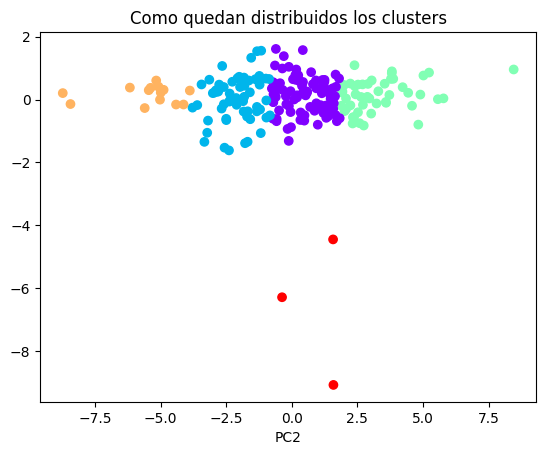

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:,1], c=kmeans.labels_, cmap='rainbow')
plt.xlabel('PC1')
plt.xlabel('PC2')
plt.title('Como quedan distribuidos los clusters')
plt.show()

In [ ]:
# Aqui hago la estadistica descriptiva
etiquetas = kmeans.labels_

# Necesito agregar a que cluster se asigno cada dato
df['Cluster al que pertenece'] = etiquetas

In [ ]:
df

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Overall,Total Cup Points,Moisture Percentage,Cluster al que pertenece
0,8.58,8.50,8.42,8.58,8.25,8.42,10.0,10.0,10.0,8.58,89.33,11.8,2
1,8.50,8.50,7.92,8.00,7.92,8.25,10.0,10.0,10.0,8.50,87.58,10.5,2
2,8.33,8.42,8.08,8.17,7.92,8.17,10.0,10.0,10.0,8.33,87.42,10.4,2
3,8.08,8.17,8.17,8.25,8.17,8.08,10.0,10.0,10.0,8.25,87.17,11.8,2
4,8.33,8.33,8.08,8.25,7.92,7.92,10.0,10.0,10.0,8.25,87.08,11.6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,7.17,7.17,6.92,7.17,7.42,7.17,10.0,10.0,10.0,7.08,80.08,11.4,3
203,7.33,7.08,6.75,7.17,7.42,7.17,10.0,10.0,10.0,7.08,80.00,10.4,3
204,7.25,7.17,7.08,7.00,7.08,7.08,10.0,10.0,10.0,7.00,79.67,11.6,3
205,6.50,6.75,6.75,7.17,7.08,7.00,10.0,10.0,10.0,6.83,78.08,11.0,3


In [ ]:
estadisticas = df.groupby('Cluster al que pertenece').describe()
print(estadisticas)

                         Aroma                                                \
                         count      mean       std   min    25%   50%    75%   
Cluster al que pertenece                                                       
0                         83.0  7.754940  0.149800  7.42  7.670  7.75  7.830   
1                         59.0  7.518644  0.170400  7.17  7.375  7.50  7.670   
2                         48.0  8.046667  0.205077  7.67  7.980  8.08  8.170   
3                         14.0  7.250714  0.245309  6.50  7.250  7.25  7.420   
4                          3.0  7.750000  0.170000  7.58  7.665  7.75  7.835   

                               Flavor            ... Total Cup Points         \
                           max  count      mean  ...              75%    max   
Cluster al que pertenece                         ...                           
0                         8.17   83.0  7.802651  ...            84.50  84.92   
1                         8.00   59.0  

In [ ]:
estadisticas.to_csv('tablaestadisticas.csv')

In [ ]:
for element in columnas:
  print(f'Caractersitica {element}')
  print(estadisticas[element])

Caractersitica Aroma
                          count      mean       std   min    25%   50%    75%  \
Cluster al que pertenece                                                        
0                          83.0  7.754940  0.149800  7.42  7.670  7.75  7.830   
1                          59.0  7.518644  0.170400  7.17  7.375  7.50  7.670   
2                          48.0  8.046667  0.205077  7.67  7.980  8.08  8.170   
3                          14.0  7.250714  0.245309  6.50  7.250  7.25  7.420   
4                           3.0  7.750000  0.170000  7.58  7.665  7.75  7.835   

                           max  
Cluster al que pertenece        
0                         8.17  
1                         8.00  
2                         8.58  
3                         7.50  
4                         7.92  
Caractersitica Flavor
                          count      mean       std   min   25%   50%    75%  \
Cluster al que pertenece                                                      

# Conclusiones por cada caracteristica

### 1. Aroma

El cluster 2 tiene el aroma promedio más alto 8.04, supongo que debe de ser el cafe que huele mas intenso o mejor, digamosle mas puro? la verdad es que no bebo cafe.
El cluster 3 tiene el aroma promedio más bajo 7.25, supongo que es el menos intenso.
### 2. Flavor

El cluster 2 vuelve a destacar con 8.07 de promedio,
El cluster 3 es de nuevo el mas bajo 7.19.
### 3. Aftertaste

El cluster 2 es el mas alto más alto 7.94,
El cluster 3 el más bajo 7.05.
### 4. Acidity

El cluster 2 contiene los cafes con mayor acidez promedio 7.98, mientras que el cluster los de la acidez mas baja 7.21 .
### 5. Body

El cluster 2 contiene los cafes que supongo tienen mejor consistencia  que es de 7.89,
y pues el cluster 3 el de la menor 7.18.

Hasta este punto pareciera que los mejores cafes se encuentran en concentrados en el cluster 2 y los peores en el 3.
### 6. Balance

El cluster 2 tiene el mejor balance 7.94, y el cluster 3 tiene el balance más bajo 7.11.
### 7. Uniformity

Todos los clusters tienen 10 de uniformity, menos el cluster 4.
### 8. Clean Cup

Todos los clusters alcanzan una puntuación de 10.
### 9. Sweetness

Todos los clusters tienen 10 en esta caracteristica, que creo que es dulzura, Lo cual no entiendo se supone que el cafe es amargo.

### 10. Overall

El cluster 2 tiene la mejor puntuacion 8.03, y el cluster 3 la peor 7.08.
### 11. Total Cup Points

El cluster 2 es el mas alto 85.8,y de nuevo el cluster 3 es el mas bajo 80.07.
### 12. Moisture Percentage

El cluster 3 tiene el Moisture Percentage más alto 11.2, esta creo como es la que mas destaca debe de ser lo que lo hace que sea el peor grupo de cafes.
El cluster 4 tiene el porcentaje de humedad más bajo 6.9 talvez eso es lo que afecta su uniformity .


### Conclusiones Generales:

* El cluster 2 parece ser donde se encuentran los mejores cafes ya que destaca en casi todas las categorias.
* Mientras que los cafes que se ubican en el cluster 3 deben de ser los de peor calidad.